In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = open("names.txt", "r").read().splitlines()

In [3]:
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
bigrams = {}
for w in names:
    chars = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1

In [5]:
bigrams = sorted(bigrams.items(), key=lambda x: -x[1]) # sort according to bigram frequency

In [66]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [67]:
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [68]:
# Instead of a dictionary, we are going to use a 2x2 matrix to store the results of the dataset.
# In order to do this, we need some way to convert from characters to indices. This will be done using a lookup table,
# defined below.

In [92]:
alphabet = sorted(list(set(''.join(names))))

charToInt = {c: i + 1 for i, c in enumerate(alphabet)}
charToInt['.'] = 0

intToChar = {i: c for c, i in charToInt.items()}

In [93]:
for name in names:
    chars = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chars, chars[1:]):
        indexOne = charToInt[ch1]
        indexTwo = charToInt[ch2]
        
        N[indexOne, indexTwo] += 1

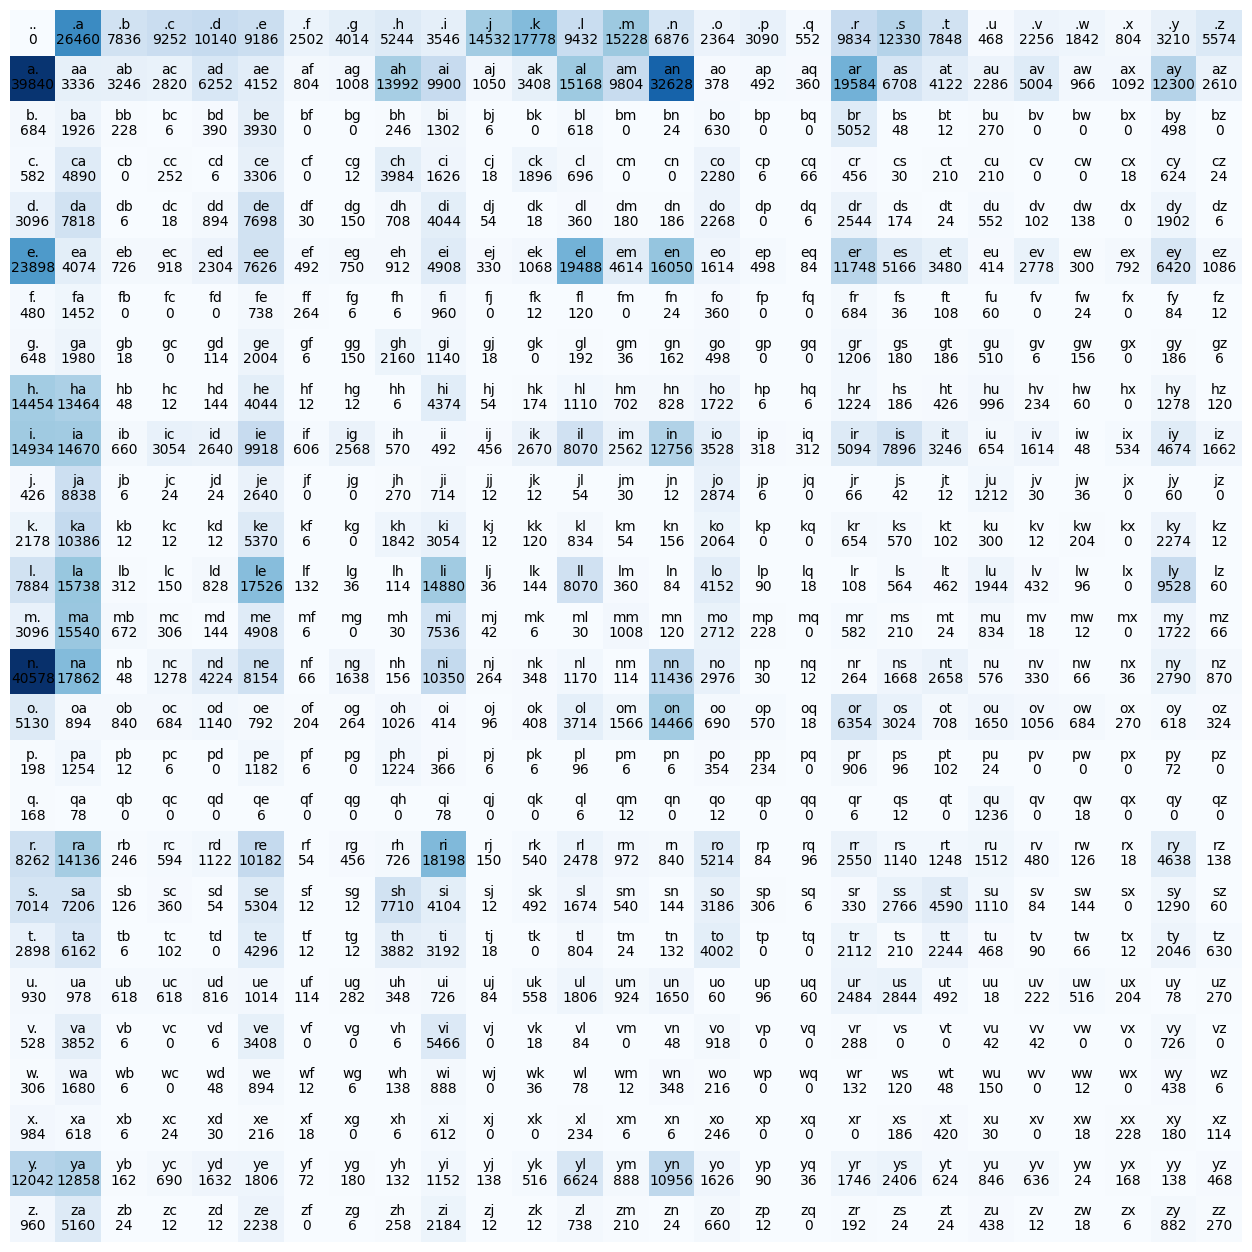

In [94]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        characterPair = intToChar[i] + intToChar[j]
        plt.text(j, i, characterPair + '\n', ha='center', va = 'center')
        plt.text(j, i, int(N[i][j]), ha='center', va = 'top')

plt.axis('off');

In [117]:
probabilityDist = N.float() / N.sum(1, keepdim=True)

tensor(1.)

In [118]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    index = 0
    while True:
        probability = probabilityDist[index].float()
        index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
        out.append(intToChar[index])
        if index == 0:
            break
        
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
